## Diseño aerodinámico

Existen cuatro variables que representan valores de parámetros para el diseño de el ala de una aeronave. Cada uno de estos parámetros puede tomar un valor entre 0 y 63.

El modelo aerodinámico dice que la elevación del ala está dada por la formula:

Elevación = (A - B)² + (C - D)² - (A-30)³ - (C-40)³

Encontrar los valores de parámetros que maximicen la elevación del ala.

In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

## Codificación

- Definir como se codificará el problema

Para este problema el cromosoma estará compuesto por 4 genes cada uno de ellos representará un parámetro

[A B C D]

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?

Se calculará el valor de la elevacion en base a los individuos de la poblacion y luego se penalizan o no en base al valor de elevación obtenido por medio de la selección por ranking.


In [2]:
def funcion_adaptacion(poblacion):
    adaptacion = []
    for ind in poblacion:
        adaptacion.append(
            ((ind[0] - ind[1]) ** 2) +
            ((ind[2] - ind[3]) ** 2) -
            ((ind[0] - 30) ** 3) -
            ((ind[2] - 40) ** 3)
        )
    return adaptacion         # Devolvemos el valor numerico del individuo en la funcion

## Selección

 Ordena los valores de adaptación basándose en el valor que se obtuvo en la función de elevación. Ordena los valores con números enteros. 
 
 Calculamos la probabilidad que tiene cada individuo, basandonos en la "SELECCION BASADA EN RANKING".
 
 Seleccionamos el/los padres para la cruza de la próxima generación, basándonos en la probabilidad de cada individuo.

In [3]:
def rank(adaptacion,poblacion):
    matriz_adaptacion = np.array(adaptacion)
    index = matriz_adaptacion.argsort()
    return (np.arange(len(matriz_adaptacion))[index.argsort()]).tolist()
 

def probabilidad_ranking(poblacion, adaptacion):
    probabilidad = []
    ranking = rank(adaptacion, poblacion)
    for i in range(len(poblacion)):
        probabilidad.append(
            ((ranking[i]) / sum(ranking))
        )
    return probabilidad
 

def seleccionar_padres(poblacion, adaptacion, cantidad_padres):
    
    tam_poblacion = len(poblacion)
    probabilidad = probabilidad_ranking(poblacion, adaptacion)        
    
    rango = range(tam_poblacion)
    indices = np.random.choice(rango,size=cantidad_padres, replace=False, p=probabilidad)
    
    
    padres = [poblacion[i] for i in indices]
    return np.array(padres)      # Devolvemos los padres en forma de array de numpy


## Cruza

In [4]:
def cruzamiento(padres, tam_descendencia):
    
    hijos = np.empty((tam_descendencia, padres.shape[1]))
    punto_cruza = np.uint8(padres.shape[0] / 2)
    
    for k in range(tam_descendencia):

        # Indices padres
        idx_p1 = k % padres.shape[0]
        idx_p2 = (k + 1) % padres.shape[0]
        
        # Generamos el hijo con la primer mitad de un padre y la segunda del otro
        hijos[k, 0:punto_cruza] = padres[idx_p1, 0:punto_cruza]
        hijos[k, punto_cruza:] = padres[idx_p2, punto_cruza:]

    return hijos        # Devolvemos el array de hijos dados los padres

## Mutación

Para cada individuo resultante del array hijos, vamos a cambiar un solo gen, por medio de la <strong>mutación por límite</strong>.

In [5]:
def mutacion(hijos):
    for indice in range(hijos.shape[0]):
        valor_aleatorio = np.random.uniform(-500, 500)
        # Sumar el valor aleatorio a uno de los genes
        hijos[indice, np.random.randint(low=0, high=(hijos.shape[1]-1))] = hijos[indice, hijos.shape[1]-1] + valor_aleatorio
    
    return hijos         # Devuelve el array de hijos mutados

# Algoritmo

In [6]:
poblacion = []
cant_genes = 4
cant_individuos = 10000
cant_generaciones = 100
cantidad_padres = 50

for i in range (cant_individuos):
    
    individuo = []
    for j in range(cant_genes):
        individuo.append(round(random.uniform(0, 63),2))

    poblacion.append(individuo)

# Ejes del gráfico
eje_gen = []
eje_adap = []

for generacion in range(cant_generaciones):
    
    poblacion = np.array(poblacion)
    
    adaptacion = funcion_adaptacion(poblacion)
    #print("adaptacion", adaptacion)
      
    padres = seleccionar_padres(poblacion, adaptacion, cantidad_padres)
    #print("padres", padres)
    
    tam_descendencia = len(poblacion) - padres.shape[0]
    
    hijos = cruzamiento(padres, tam_descendencia)
    
    hijos_mutados = mutacion(hijos)
    
    # Creamos una nueva poblacion a partir de los padres y de los hijos    
    poblacion[0:padres.shape[0], :] = padres
    poblacion[padres.shape[0]:, :] = hijos_mutados
    
    eje_adap.append(max(adaptacion))
    eje_gen.append(generacion)

# Obtener la mejor solución
adaptacion = funcion_adaptacion(poblacion)
mejor_adap_index = np.where(adaptacion == np.max(adaptacion))

print("Mejor resultado : ", poblacion[mejor_adap_index, :])
print("Adaptación del mejor resultado : ", adaptacion[mejor_adap_index[0][0]])

Mejor resultado :  [[[-491.40822479  349.24551228 -493.36602686    6.63      ]]]
Adaptación del mejor resultado :  294441747.00090295


## Gráfico de adaptacion según las generaciones

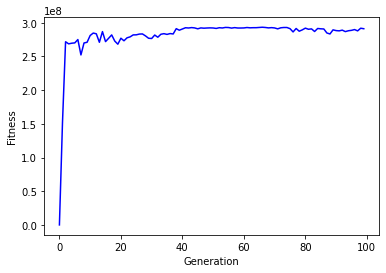

In [8]:
fig, ax = plt.subplots()
ax.plot(eje_gen, eje_adap, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()